---
author: "Юрій Клебан"
---

# Google Services

## Google Spreadsheets

> THIS CHAPTER IS UNDER CONSTRUCTION / Working with Google Spreadsheets need account authorization.

googlesheets4 is a package to work with Google Sheets from R. 

In [127]:
#install.packages("googlesheets4")
library(googlesheets4)

You can read google documents after authentification on google service. There is sample code:

```
read_sheet("https://docs.google.com/spreadsheets/d/1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY/edit#gid=780868077")
gs4_deauth()
```

Let's read sample dataset `gapminder`. It detailed described in next paragraph.

In [128]:
# gs4_example("gapminder")

---

## Google Search Trends

**`Google Trends`** is a service for analyzing search requests by many filters like `region` (continent, country, locality), `period` (year, month), `information category` (business, education, hobby, healthcare), `information type` (news, shopping, video, images) https://trends.google.com/trends/

In [129]:
# install.packages('gtrendsR')
# install.packages('ggplot2')
library(gtrendsR) # loading package for Google Trends queries
library(ggplot2)

Let's configure out google trends query params

In [130]:
keywords = c("Bitcoin", "FC Barcelona") # search keywords
country = c('AT') # search region from https://support.google.com/business/answer/6270107?hl=en
time = ("2021-01-01 2021-06-01") # period
channel = 'web' # search channel: google search ('news' - google news, 'images' - google images)

In [131]:
# query
trends = gtrends(keywords, gprop = channel, geo = country, time = time, tz = "UTC")

In [132]:
time_trend = trends$interest_over_time
head(time_trend)

,date,hits,keyword,geo,time,gprop,category
,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2021-01-01,36,Bitcoin,AT,2021-01-01 2021-06-01,web,0
2,2021-01-02,67,Bitcoin,AT,2021-01-01 2021-06-01,web,0
3,2021-01-03,74,Bitcoin,AT,2021-01-01 2021-06-01,web,0
4,2021-01-04,57,Bitcoin,AT,2021-01-01 2021-06-01,web,0
5,2021-01-05,53,Bitcoin,AT,2021-01-01 2021-06-01,web,0
6,2021-01-06,66,Bitcoin,AT,2021-01-01 2021-06-01,web,0


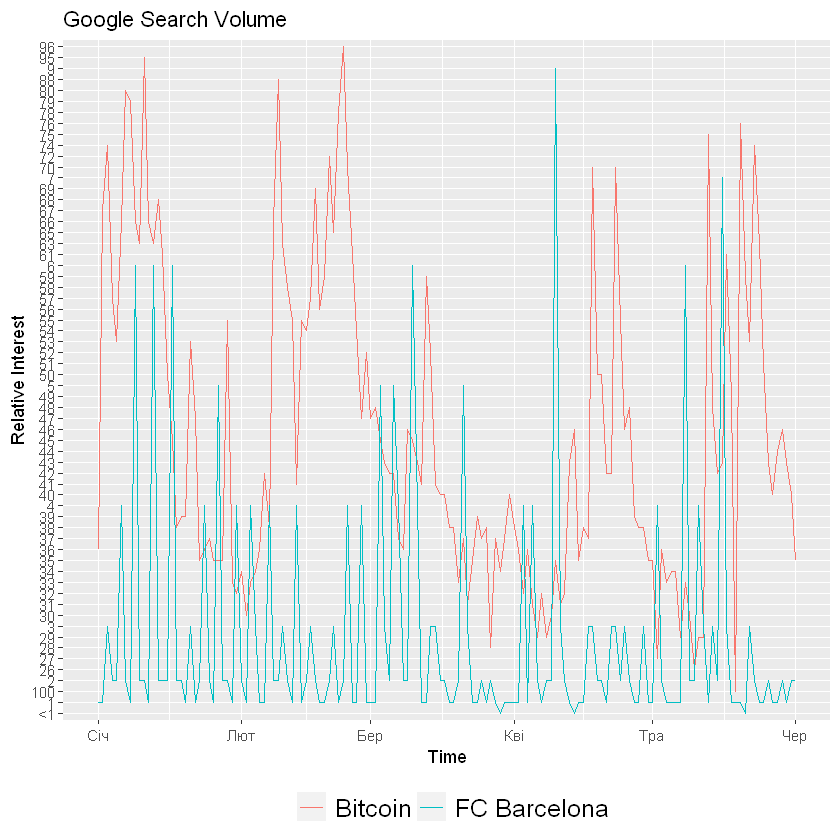

In [133]:
plot <- ggplot(data=time_trend, aes(x=date, y=hits, group=keyword, col=keyword)) +
  geom_line() +
  xlab('Time') + 
  ylab('Relative Interest') + 
  theme(legend.title = element_blank(), legend.position="bottom", legend.text=element_text(size=15)) + 
  ggtitle("Google Search Volume")  

plot

## Набори даних

1. https://github.com/kleban/r-book-published/tree/main/datasets/telecom_users.csv
2. https://github.com/kleban/r-book-published/tree/main/datasets/telecom_sers.xlsx
3. https://github.com/kleban/r-book-published/tree/main/datasets/Default_Fin.csv
4. https://github.com/kleban/r-book-published/tree/main/datasets/employes.xml

---

## References

1. [SQLite in R. Datacamp](https://www.datacamp.com/community/tutorials/sqlite-in-r)
2. [Tidyverse googlesheets4 0.2.0](https://www.tidyverse.org/blog/2020/05/googlesheets4-0-2-0/)
<!-- 3. [Telecom users dataset. Practice classification with a telco dataset.Kaggle](https://www.kaggle.com/radmirzosimov/telecom-users-dataset) -->
4. [Binanace spot Api Docs](https://github.com/binance/binance-spot-api-docs/blob/master/rest-api.md#klinecandlestick-data)
5. [Web Scraping in R: rvest Tutorial](https://www.datacamp.com/community/tutorials/r-web-scraping-rvest) by Arvid Kingl